# Software Defect Detection


## 1. Introduction

Software defect detection is an application area that employs machine learning models for automatically identifying defective parts in programs.

In this assignment you will explore various classifiers with multiple datasets. The purpose is to measure the performance of the following well-established algorithms in software defect detection tasks.


### Classifiers
The classifiers to be studied are:
* $C_1$: Logistic Regression
* $C_2$: Perceptron
* $C_3$: Support Vector Machines (with linear &amp; RBF kernel)
* $C_4$: Decision Tree
* $C_5$: Random Forests
* $C_6$: Feed-forward Neural Network


### Datasets
The classification performance of the abovementioned algorithm will be studied in a collection of 3 datasets on software defect detection. The datasets are:

* `jm1` (Description [here](https://www.openml.org/search?type=data&status=active&id=1053))
* `mc1` (Description [here](https://www.openml.org/search?type=data&status=active&id=1056))
* `pc3` (Description [here](https://www.openml.org/search?type=data&status=active&id=1050))

**All datasets are provided with the assignment in the present compressed file.**

There cases of missing values in the datasets. These cases should be addressed by removing the **rows** with missing values.


## 2. Experiments

You will use 80% of the datasets for training and 20% for testing by applying the 5-fold cross validation technique. The algorithms will be evaluated by measuring the values of the four following well-established metrics:
* $M_1$: Accuracy
* $M_2$: F1-score
* $M_3$: G-Mean score
* $M_4$: Fit time

Repeat your experiments with different features' normalization methods:
* $N_1$: No normalization (use raw features)
* $N_2$: Min-max normalization
* $N_3$: Feature Standardization



## 3. Deliverable & Deadline

You will work in pairs according to your preferences.

The deliverable will be a notebook, using both surnames as a file name. This file should include the code and the results for each one of the 3 datasets. Both students of a team must upload the same file into the e-learning platform. **Only one file per pair will be checked. So, if you upload different versions, then one of them will not be examined. You are free to use any Python library, even if it is not a part of Anaconda3. However, in the latter case, please make sure that you mention the appropriate conda or pip command for installing the library.**

**For each dataset, your notebook should present:**

* 4 bar plots that will compare the performance ($M1$, $M2$, $M3$, and $M4$) of the six classifiers ($C1$, $C2$, $C3$, $C4$, $C5$, and $C6$) for the cases $N_1$, $N_2$, and $N_3$ (please consult the example in the figure below).
* A discussion on the performance of the classifiers.

**The deadline is 30/01/2024. NO DEADLINE EXTENSION WILL BE GIVEN.**

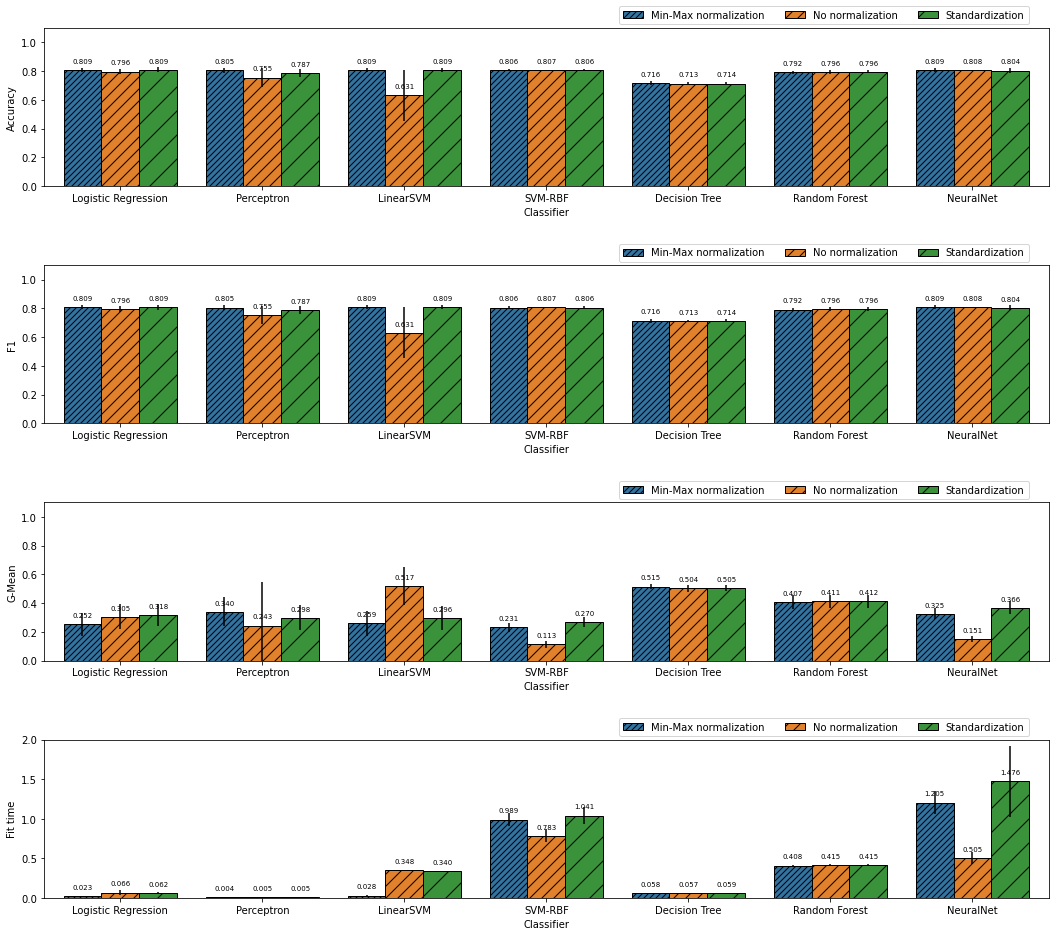

# Dataset 1: jm1.csv

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
set1 = pd.read_csv('jm1.csv',sep=",")

set1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10885 entries, 0 to 10884
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loc                10885 non-null  float64
 1   v(g)               10885 non-null  float64
 2   ev(g)              10885 non-null  float64
 3   iv(g)              10885 non-null  float64
 4   n                  10885 non-null  float64
 5   v                  10885 non-null  float64
 6   l                  10885 non-null  float64
 7   d                  10885 non-null  float64
 8   i                  10885 non-null  float64
 9   e                  10885 non-null  float64
 10  b                  10885 non-null  float64
 11  t                  10885 non-null  float64
 12  lOCode             10885 non-null  int64  
 13  lOComment          10885 non-null  int64  
 14  lOBlank            10885 non-null  int64  
 15  locCodeAndComment  10885 non-null  int64  
 16  uniq_Op            108

In [2]:
set1.isnull().values.any()

False

We have a dataset with 20 columns, feautures, no missing values and one target value. However there is something wrong, since for the feautures uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount we expect to take numerical values but instead we are taking variable type int.

In [3]:
print(set1['uniq_Opnd'].unique())

['1.2' '1' '36' '135' '16' '24' '0' '5' '12' '23' '4' '64' '10' '47' '59'
 '56' '113' '25' '103' '29' '44' '21' '28' '7' '15' '57' '63' '53' '6'
 '76' '51' '30' '17' '8' '19' '18' '52' '32' '20' '40' '22' '86' '3' '78'
 '14' '11' '68' '38' '9' '13' '42' '67' '49' '?' '43' '34' '27' '33' '45'
 '26' '48' '46' '35' '87' '101' '104' '165' '126' '75' '112' '62' '77'
 '162' '31' '138' '80' '160' '58' '69' '60' '70' '2' '50' '71' '175' '39'
 '37' '54' '73' '65' '41' '66' '85' '95' '74' '94' '102' '88' '147' '117'
 '84' '55' '81' '132' '61' '140' '96' '90' '146' '806' '154' '110' '241'
 '128' '99' '119' '127' '164' '91' '142' '72' '89' '137' '174' '122' '93'
 '108' '83' '256' '176' '152' '100' '134' '79' '82' '115' '215' '133'
 '182' '183' '97' '111' '109' '549' '157' '158' '136' '168' '355' '195'
 '121' '167' '1026' '262' '279' '407' '226' '811' '609' '264' '145' '125'
 '118' '129' '139' '159' '98' '92' '105' '114' '107' '148']


We find that we have a value of ? in our values. As our definition of the exercise implies, we will delete all these rows and feautures that have such values.

In [4]:
prob_features= ['uniq_Op', 'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount']
set1 = set1.replace('?', pd.NaT).dropna(subset=prob_features)

for column in prob_features:
    set1[column] = pd.to_numeric(set1[column], errors='coerce')

Let's check the values  of these columns again and see if they have taken the correct type for the variables.

In [5]:
set1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10880 entries, 0 to 10884
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loc                10880 non-null  float64
 1   v(g)               10880 non-null  float64
 2   ev(g)              10880 non-null  float64
 3   iv(g)              10880 non-null  float64
 4   n                  10880 non-null  float64
 5   v                  10880 non-null  float64
 6   l                  10880 non-null  float64
 7   d                  10880 non-null  float64
 8   i                  10880 non-null  float64
 9   e                  10880 non-null  float64
 10  b                  10880 non-null  float64
 11  t                  10880 non-null  float64
 12  lOCode             10880 non-null  int64  
 13  lOComment          10880 non-null  int64  
 14  lOBlank            10880 non-null  int64  
 15  locCodeAndComment  10880 non-null  int64  
 16  uniq_Op            10880 no

Great,now we have the correct types for our feautures. Let's see the nature of them.

In [6]:
pd.set_option("display.max.columns", None)
pd.set_option("display.precision", 2)
set1.describe()


,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
count,10880.00,10880.00,10880.00,10880.00,10880.00,10880.00,10880.00,10880.00,10880.00,1.09e+04,10880.00,1.09e+04,10880.00,10880.00,10880.00,10880.00,10880.00,10880.00,10880.00,10880.00,10880.00
mean,42.02,6.35,3.40,4.00,114.39,673.77,0.14,14.18,29.44,3.68e+04,0.22,2.05e+03,26.25,2.74,4.63,0.37,11.18,16.75,68.11,46.39,11.29
std,76.61,13.02,6.77,9.12,249.55,1939.25,0.16,18.71,34.42,4.34e+05,0.65,2.41e+04,59.62,9.01,9.97,1.91,10.05,26.67,151.51,100.35,22.60
min,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00e+00,0.00,0.00e+00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
25%,11.00,2.00,1.00,1.00,14.00,48.43,0.03,3.00,11.86,1.62e+02,0.02,9.00e+00,4.00,0.00,0.00,0.00,5.00,4.00,8.00,6.00,3.00
50%,23.00,3.00,1.00,2.00,49.00,217.13,0.08,9.09,21.93,2.03e+03,0.07,1.13e+02,13.00,0.00,2.00,0.00,11.00,11.00,29.00,19.00,5.00
75%,46.00,7.00,3.00,4.00,119.00,620.85,0.16,18.90,36.78,1.14e+04,0.21,6.34e+02,28.00,2.00,5.00,0.00,16.00,21.00,71.00,48.00,13.00
max,3442.00,470.00,165.00,402.00,8441.00,80843.08,1.30,418.20,569.78,3.11e+07,26.95,1.73e+06,2824.00,344.00,447.00,108.00,411.00,1026.00,5420.00,3021.00,826.00


Something that it's really important to notice is that there are outliers in all the columns that affects importantly the values of the mean and probably the quality of the classification.

In order to understand that let's check the nature of the feauture loc. Feauture loc describes how many rows exists in a block of a code. The 50% of them are max at 23 rows, but the mean is 42.02, approximately 100% up!

There are points that have 3442 of blocks of code. That's not the case! In these exercise we will deal the by transforming the data with 2 methods (min max scaling,feature standardization) and we will keep no transformation just for the comparison.

Now let's see the balance of the dataset.

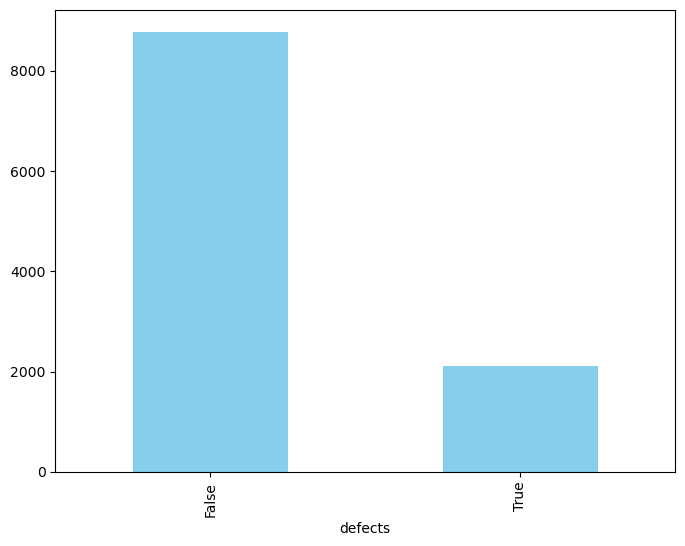

In [7]:
plt.figure(figsize=(8, 6))
set1['defects'].value_counts().plot(kind='bar', color='skyblue')
plt.show()

Its completely clear that we are talking about an imbalanced dataset.

In [8]:
pd.set_option('display.float_format', '{:.3f}'.format)

We build a function that we run all the models and return us the results.We will use Pipelines in order to transform and fit our data when need and k fold cross validation for better accurancy

In [9]:
def run_expiriments(X, Y, scaler,activation1):
    warnings.filterwarnings("ignore")
    scorers = {
    'accuracy_score': make_scorer(accuracy_score),
    'balanced_accuracy_score': make_scorer(balanced_accuracy_score),
    'f1_score': make_scorer(f1_score, average='weighted'),
    'g_mean':make_scorer(geometric_mean_score, greater_is_better=True)
   }    
    pipelines = [
        ('Logistic Regression', Pipeline([('scaler', scaler), ('logistic', LogisticRegression(max_iter=1000,random_state=1))])),
        ('Perceptron', Pipeline([('scaler', scaler), ('perceptron', Perceptron(max_iter=10000, random_state=1))])),
        ('SVM Linear', Pipeline([('scaler', scaler), ('svm', SVC(kernel='linear', max_iter=10000,random_state=1))])),
        ('SVM RBF', Pipeline([('scaler', scaler), ('svm', SVC(kernel='rbf',max_iter=10000,random_state=1))])),
        ('Decision Tree', Pipeline([('scaler', scaler), ('classifier',DecisionTreeClassifier(random_state=1))])),
        ('Random Forest', Pipeline([('scaler', scaler), ('classifier',RandomForestClassifier(random_state=1))])),
        ('MLP', Pipeline([('scaler', scaler), ('classifier', MLPClassifier(activation=activation1, hidden_layer_sizes=(100,50), max_iter=1000, random_state=1))])),
    ]

    result_tables = []  

    for name, pipe in pipelines:
        cv_results = cross_validate(pipe, X, Y, cv=5, scoring=scorers, return_train_score=True)

        result_table = pd.DataFrame({
            'Classifier': [name],
            'Accuracy': [cv_results['test_accuracy_score'].mean()],
            'F1 Score': [cv_results['test_f1_score'].mean()],
            'Balanced Accuracy': [cv_results['test_balanced_accuracy_score'].mean()],
            'G_mean': [cv_results['test_g_mean'].mean()],
            'Fit Time': [cv_results['fit_time'].mean()]
        })

        result_tables.append(result_table)

    final_result_table = pd.concat(result_tables, ignore_index=True)
    return final_result_table

In [11]:
!pip install imbalanced-learn==0.8.1

import warnings
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_validate, ShuffleSplit
from sklearn.metrics import make_scorer, f1_score, accuracy_score, balanced_accuracy_score
from imblearn.metrics import geometric_mean_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline



cv= 5 
Y = np.array(set1.iloc[:, 21])

X = np.array(set1.iloc[:, :21])


In [12]:
X.shape

(10880, 21)

In [13]:
JM1_None=run_expiriments(X,Y,None,'relu')

,Classifier,Accuracy,F1 Score,Balanced Accuracy,G_mean,Fit Time
0,Logistic Regression,0.797,0.749,0.540,0.335,0.655
1,Perceptron,0.591,0.529,0.494,0.158,0.011
2,SVM Linear,0.324,0.291,0.511,0.325,0.481
3,SVM RBF,0.807,0.725,0.505,0.113,2.169
4,Decision Tree,0.713,0.719,0.563,0.507,0.134
5,Random Forest,0.792,0.757,0.560,0.407,1.991
6,MLP,0.578,0.590,0.580,0.487,0.891


In [40]:
JM1_None.iloc[6,:]

Classifier            MLP
Accuracy            0.578
F1 Score            0.590
Balanced Accuracy   0.580
G_mean              0.487
Fit Time            0.891
Name: 6, dtype: object

In [14]:
JM1_Standard=run_expiriments(X,Y,StandardScaler(),'relu')

In [15]:
JM1_Standard

,Classifier,Accuracy,F1 Score,Balanced Accuracy,G_mean,Fit Time
0,Logistic Regression,0.809,0.754,0.543,0.317,0.045
1,Perceptron,0.755,0.741,0.564,0.462,0.012
2,SVM Linear,0.805,0.729,0.510,0.153,1.718
3,SVM RBF,0.806,0.744,0.528,0.270,2.578
4,Decision Tree,0.711,0.718,0.562,0.506,0.138
5,Random Forest,0.794,0.759,0.563,0.413,2.018
6,MLP,0.775,0.757,0.580,0.480,17.828


In [16]:
JM1_MinMax=run_expiriments(X,Y,MinMaxScaler(),'relu')
JM1_MinMax

,Classifier,Accuracy,F1 Score,Balanced Accuracy,G_mean,Fit Time
0,Logistic Regression,0.809,0.744,0.528,0.252,0.021
1,Perceptron,0.803,0.739,0.524,0.244,0.012
2,SVM Linear,0.807,0.721,0.501,0.039,1.711
3,SVM RBF,0.806,0.738,0.521,0.231,2.573
4,Decision Tree,0.714,0.720,0.564,0.508,0.134
5,Random Forest,0.793,0.758,0.560,0.407,1.992
6,MLP,0.808,0.765,0.562,0.389,17.162


In [17]:
JM1_None_1=run_expiriments(X,Y,None,'logistic')
JM1_None_1

,Classifier,Accuracy,F1 Score,Balanced Accuracy,G_mean,Fit Time
0,Logistic Regression,0.797,0.749,0.540,0.335,0.704
1,Perceptron,0.591,0.529,0.494,0.158,0.011
2,SVM Linear,0.324,0.291,0.511,0.325,0.536
3,SVM RBF,0.807,0.725,0.505,0.113,2.372
4,Decision Tree,0.713,0.719,0.563,0.507,0.144
5,Random Forest,0.792,0.757,0.560,0.407,2.058
6,MLP,0.808,0.736,0.518,0.210,2.561


In [18]:
JM1_Standard_1=run_expiriments(X,Y,StandardScaler(),'logistic')
JM1_Standard_1

,Classifier,Accuracy,F1 Score,Balanced Accuracy,G_mean,Fit Time
0,Logistic Regression,0.809,0.754,0.543,0.317,0.062
1,Perceptron,0.755,0.741,0.564,0.462,0.014
2,SVM Linear,0.805,0.729,0.510,0.153,1.922
3,SVM RBF,0.806,0.744,0.528,0.270,2.724
4,Decision Tree,0.711,0.718,0.562,0.506,0.137
5,Random Forest,0.794,0.759,0.563,0.413,2.140
6,MLP,0.805,0.757,0.549,0.352,13.304


In [42]:
JM1_MinMax_1=run_expiriments(X,Y,MinMaxScaler(),'logistic')

In [43]:
JM1_MinMax_1

,Classifier,Accuracy,F1 Score,Balanced Accuracy,G_mean,Fit Time
0,Logistic Regression,0.809,0.744,0.528,0.252,0.076
1,Perceptron,0.803,0.739,0.524,0.244,0.020
2,SVM Linear,0.807,0.721,0.501,0.039,2.893
3,SVM RBF,0.806,0.738,0.521,0.231,3.841
4,Decision Tree,0.714,0.720,0.564,0.508,0.137
5,Random Forest,0.793,0.758,0.560,0.407,2.171
6,MLP,0.807,0.754,0.544,0.323,10.562


In [20]:
JM1_None_2=run_expiriments(X,Y,None,'tanh')

,Classifier,Accuracy,F1 Score,Balanced Accuracy,G_mean,Fit Time
0,Logistic Regression,0.797,0.749,0.540,0.335,0.698
1,Perceptron,0.591,0.529,0.494,0.158,0.010
2,SVM Linear,0.324,0.291,0.511,0.325,0.542
3,SVM RBF,0.807,0.725,0.505,0.113,2.362
4,Decision Tree,0.713,0.719,0.563,0.507,0.146
5,Random Forest,0.792,0.757,0.560,0.407,2.153
6,MLP,0.807,0.736,0.518,0.209,1.783


In [34]:
JM1_None_2.iloc[6,:]

Classifier            MLP
Accuracy            0.807
F1 Score            0.736
Balanced Accuracy   0.518
G_mean              0.209
Fit Time            1.783
Name: 6, dtype: object

In [21]:
JM1_Standard_2=run_expiriments(X,Y,StandardScaler(),'tanh')

,Classifier,Accuracy,F1 Score,Balanced Accuracy,G_mean,Fit Time
0,Logistic Regression,0.809,0.754,0.543,0.317,0.053
1,Perceptron,0.755,0.741,0.564,0.462,0.012
2,SVM Linear,0.805,0.729,0.510,0.153,1.857
3,SVM RBF,0.806,0.744,0.528,0.270,2.867
4,Decision Tree,0.711,0.718,0.562,0.506,0.156
5,Random Forest,0.794,0.759,0.563,0.413,2.168
6,MLP,0.758,0.748,0.577,0.492,78.433


In [36]:
JM1_Standard_2.iloc[6,:]

Classifier             MLP
Accuracy             0.758
F1 Score             0.748
Balanced Accuracy    0.577
G_mean               0.492
Fit Time            78.433
Name: 6, dtype: object

In [38]:
JM1_MinMax_2=run_expiriments(X,Y,MinMaxScaler(),'tanh')

In [39]:
JM1_MinMax_2.iloc[6,:]

Classifier            MLP
Accuracy            0.807
F1 Score            0.751
Balanced Accuracy   0.539
G_mean              0.314
Fit Time            6.376
Name: 6, dtype: object

We wanted to experienced with different activation function and see how MLP's they will run. Now, since we take our results we will restore the function to thei previous state and we will continue with logistic activation function

In [44]:
def run_expiriments(X, Y, scaler):
    warnings.filterwarnings("ignore")
    scorers = {
    'accuracy_score': make_scorer(accuracy_score),
    'balanced_accuracy_score': make_scorer(balanced_accuracy_score),
    'f1_score': make_scorer(f1_score, average='weighted'),
    'g_mean':make_scorer(geometric_mean_score, greater_is_better=True)
   }    
    pipelines = [
        ('Logistic Regression', Pipeline([('scaler', scaler), ('logistic', LogisticRegression(max_iter=1000,random_state=1))])),
        ('Perceptron', Pipeline([('scaler', scaler), ('perceptron', Perceptron(max_iter=10000, random_state=1))])),
        ('SVM Linear', Pipeline([('scaler', scaler), ('svm', SVC(kernel='linear', max_iter=10000,random_state=1))])),
        ('SVM RBF', Pipeline([('scaler', scaler), ('svm', SVC(kernel='rbf',max_iter=10000,random_state=1))])),
        ('Decision Tree', Pipeline([('scaler', scaler), ('classifier',DecisionTreeClassifier(random_state=1))])),
        ('Random Forest', Pipeline([('scaler', scaler), ('classifier',RandomForestClassifier(random_state=1))])),
        ('MLP', Pipeline([('scaler', scaler), ('classifier', MLPClassifier(activation='logistic', hidden_layer_sizes=(100,50), max_iter=1000, random_state=1))])),
    ]

    result_tables = []  

    for name, pipe in pipelines:
        cv_results = cross_validate(pipe, X, Y, cv=5, scoring=scorers, return_train_score=True)

        result_table = pd.DataFrame({
            'Classifier': [name],
            'Accuracy': [cv_results['test_accuracy_score'].mean()],
            'F1 Score': [cv_results['test_f1_score'].mean()],
            'Balanced Accuracy': [cv_results['test_balanced_accuracy_score'].mean()],
            'G_mean': [cv_results['test_g_mean'].mean()],
            'Fit Time': [cv_results['fit_time'].mean()]
        })

        result_tables.append(result_table)

    final_result_table = pd.concat(result_tables, ignore_index=True)
    return final_result_table

In [57]:
def plot_experiment_results(Exp_MinMax, Exp_None, Exp_Standard):
    Measures = ['Classifier', 'Accuracy', 'F1 Score', 'G_mean', 'Fit Time']
    Exp_MinMax_temp = pd.DataFrame(Exp_MinMax, columns=Measures)
    Exp_None_temp = pd.DataFrame(Exp_None, columns=Measures)
    Exp_Standard_temp = pd.DataFrame(Exp_Standard, columns=Measures)
    X = np.arange(len(Exp_MinMax_temp))

    for col in Measures[1:]:
        plt.figure(figsize=(20, 6))
        plt.bar(X - 0.2, Exp_MinMax_temp[col], width=0.2, label='Min-Max Normalization')
        plt.bar(X, Exp_None_temp[col], width=0.2, label='No Normalization')
        plt.bar(X + 0.2, Exp_Standard_temp[col], width=0.2, label='Standardization')
        
        plt.ylabel(col)
        plt.xticks(X, Exp_MinMax_temp['Classifier'])
        plt.legend()

        for i, value in enumerate(Exp_MinMax_temp[col]):
            plt.text(X[i] - 0.2, value, f'{value:.3f}', ha='center', va='bottom')
        
        for i, value in enumerate(Exp_None_temp[col]):
            plt.text(X[i], value, f'{value:.3f}', ha='center', va='bottom')
        
        for i, value in enumerate(Exp_Standard_temp[col]):
            plt.text(X[i] + 0.2, value, f'{value:.3f}', ha='center', va='bottom')
        
        plt.show()

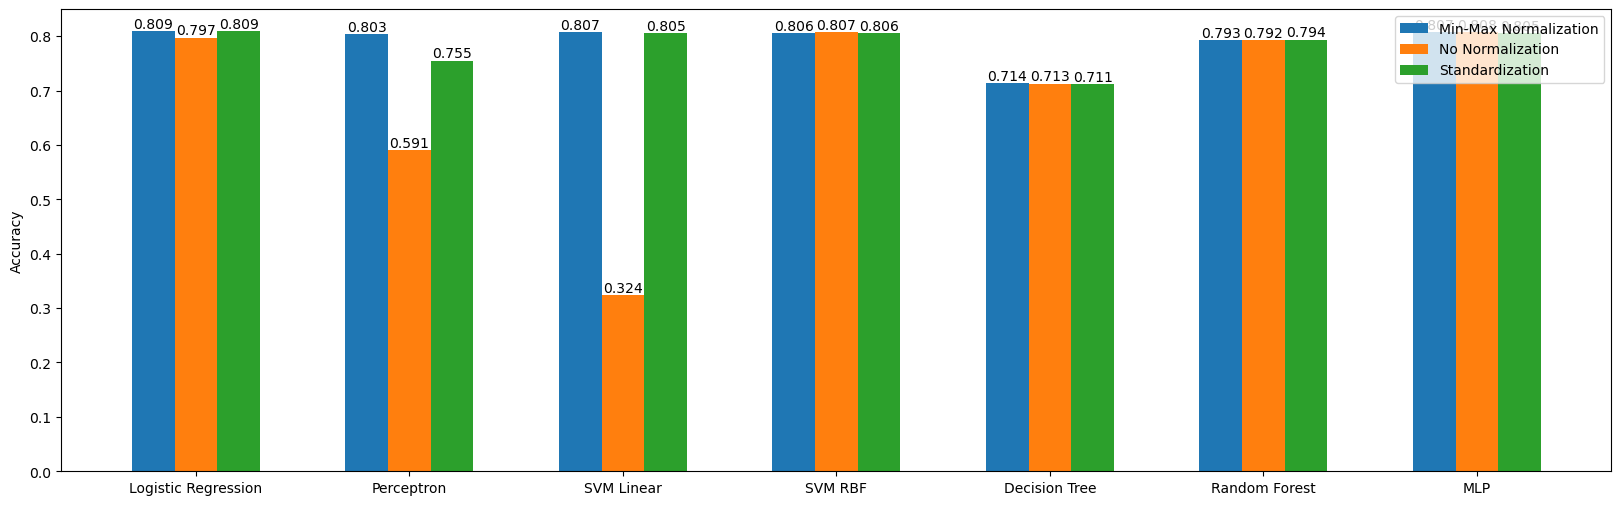

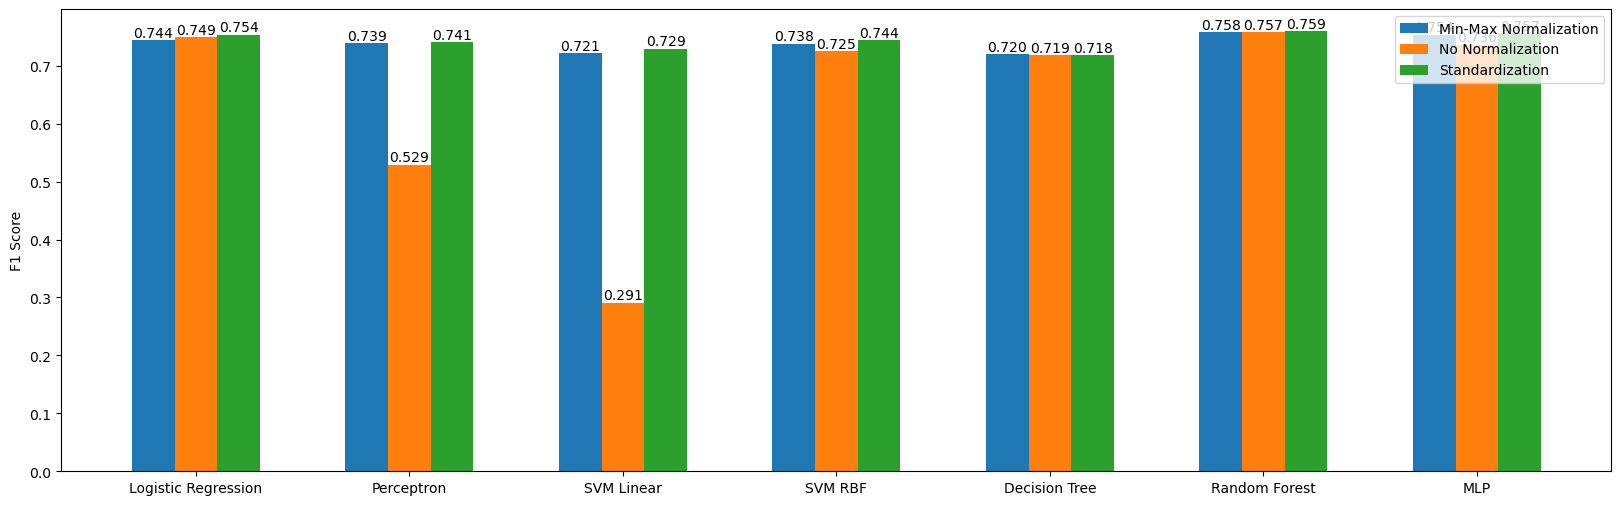

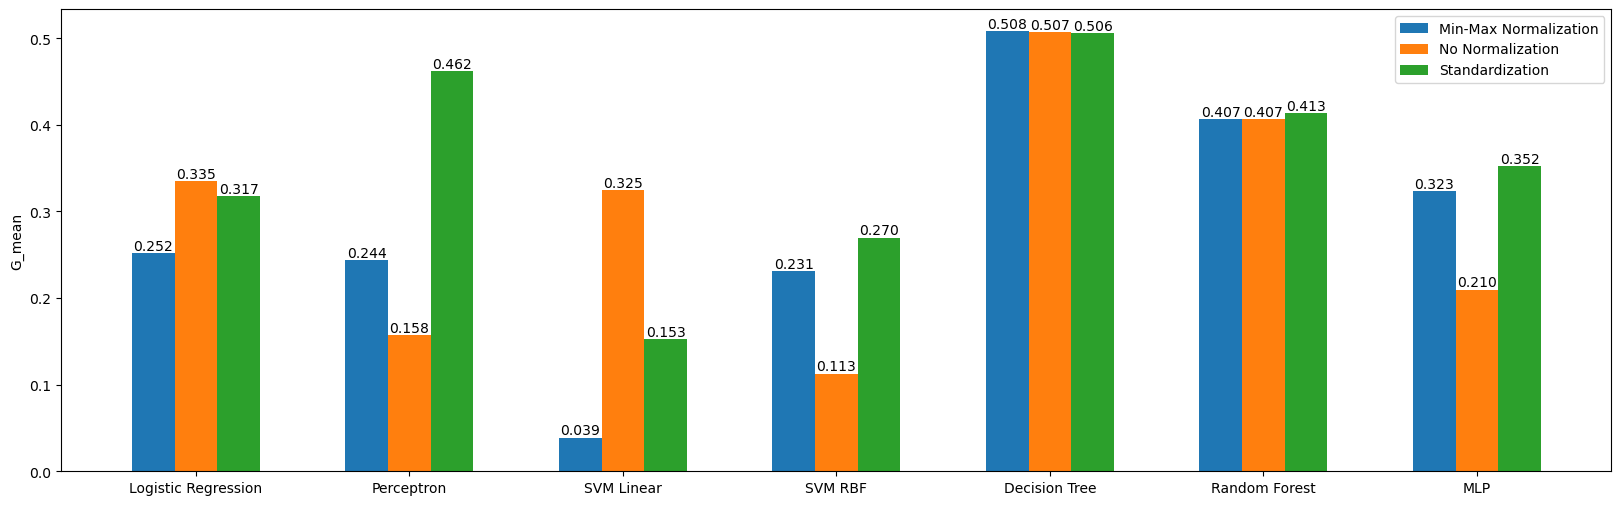

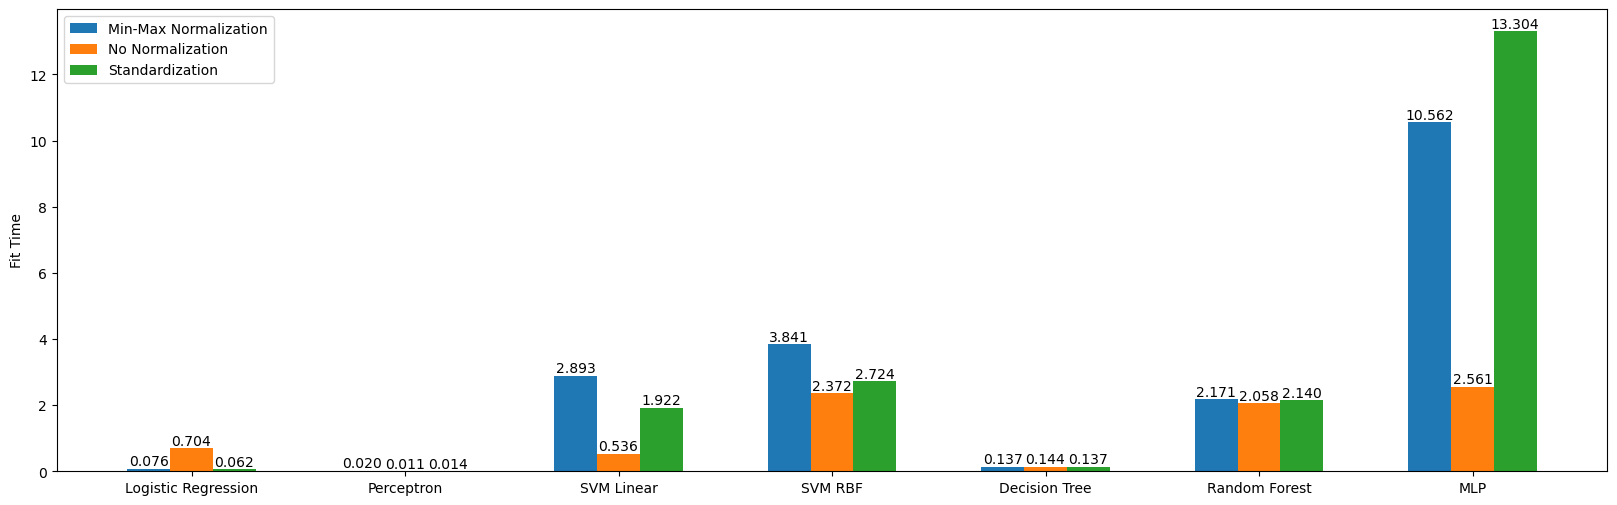

In [58]:
plot_experiment_results(JM1_MinMax_1, JM1_None_1, JM1_Standard_1)

Let's discuss the results for this dataset:

A) We can clearly see a significant difference in SVM Linear when using a Scaler compared to when not using a Scaler. This is absolutely normal. SVM Linear tries to maximize the distance between support vectors and the separating hyperplane. We mentioned from the beginning that all the features have outliers in this dataset. So, the SVM tries to fit the hyperplane to the outliers and dominate the other values. This is logical because the distance between the outliers and the rest of the data is already big. When we transform the data, we actually eliminate the influence of the outliers.

B) Perceptron performs poorly with no data transformation, as expected, because it tries to separate the classes linearly, which is not possible without transforming the data. It becomes easier to separate the classes linearly after transforming the data.

C) SVM RBF performs better than SVM linear because it tries to classify the problems non-linearly. However, the computation time between SVM Linear and SVM RBF is almost two times bigger!

D) Decision Tree and Random Forest have almost the same performance regardless of the normalization method. That's because they are not so sensitive to outliers; they check the importance of each feature, and if it's not important, they eliminate it. The rules remain the same when transforming the data; the only thing that changes is the value of the step functions.

The main point for this dataset (and the rest of the datasets that we will check later) is that it's imbalanced. That means that we don't care so much about accuracy but about balanced accuracy and G_Mean scores. Our goal is to predict correctly the minority of the classes.

The F1 score is somewhat following the accuracy, but we can see some surprises in the G_Mean score.

A) SVM linear G_Mean scores better when the dataset has no standardization. That means that when we transform our data for this dataset, the model, despite achieving a higher F1 Score, overfits the data to the major class.

B) If we base our results on accuracy, we will choose Logistic Regression or MLP. But if we choose based on G_Mean, we will choose Decision Tree!

Something else interesting is the high computation time for MLP with standardization. We can attribute this to the oscillations occurring during SGD. The high fit time, coupled with low G_Mean and F1 scores, is evident. Upon inspection of the sklearn library, it is revealed that the alpha parameter is set to 0.001. This value is too low and can contribute to oscillations.

Again, all of the metrics indicate that we don't have good performance. G_Mean is really low, and the accuracy doesn't go up to 80% no matter what normalization method or model we are using.

# Dataset 2


In [59]:
set2 = pd.read_csv('mc1.csv',sep=",")

In [60]:
set2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9466 entries, 0 to 9465
Data columns (total 39 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   LOC_BLANK                        9466 non-null   int64  
 1   BRANCH_COUNT                     9466 non-null   int64  
 2   CALL_PAIRS                       9466 non-null   int64  
 3   LOC_CODE_AND_COMMENT             9466 non-null   int64  
 4   LOC_COMMENTS                     9466 non-null   int64  
 5   CONDITION_COUNT                  9466 non-null   int64  
 6   CYCLOMATIC_COMPLEXITY            9466 non-null   int64  
 7   CYCLOMATIC_DENSITY               9466 non-null   float64
 8   DECISION_COUNT                   9466 non-null   int64  
 9   DESIGN_COMPLEXITY                9466 non-null   int64  
 10  DESIGN_DENSITY                   9466 non-null   int64  
 11  EDGE_COUNT                       9466 non-null   int64  
 12  ESSENTIAL_COMPLEXITY

There is no missing values or mismatch types. So we continue.

In [61]:
set2.describe()

,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DESIGN_COMPLEXITY,DESIGN_DENSITY,EDGE_COUNT,ESSENTIAL_COMPLEXITY,ESSENTIAL_DENSITY,LOC_EXECUTABLE,PARAMETER_COUNT,GLOBAL_DATA_COMPLEXITY,GLOBAL_DATA_DENSITY,HALSTEAD_CONTENT,HALSTEAD_DIFFICULTY,HALSTEAD_EFFORT,HALSTEAD_ERROR_EST,HALSTEAD_LENGTH,HALSTEAD_LEVEL,HALSTEAD_PROG_TIME,HALSTEAD_VOLUME,MAINTENANCE_SEVERITY,MODIFIED_CONDITION_COUNT,MULTIPLE_CONDITION_COUNT,NODE_COUNT,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL
count,9466.000,9466.000,9466.000,9466.000,9466.000,9466.000,9466.000,9466.000,9466.000,9466.000,9466.000,9466.000,9466.000,9466.000,9466.000,9466.000,9466.000,9466.000,9466.000,9466.000,9466.000,9466.000,9466.000,9466.000,9466.000,9466.000,9466.000,9466.000,9466.000,9466.000,9466.000,9466.000,9466.000,9466.000,9466.000,9466.000,9466.000,9466.000
mean,1.557,2.954,1.287,0.784,1.613,3.315,1.924,0.670,1.571,1.589,0.851,6.760,1.239,0.012,6.250,0.134,0.904,0.448,14.242,6.270,12649.499,0.058,34.563,0.355,702.750,175.063,0.742,0.872,1.658,6.708,0.539,13.780,20.783,5.928,6.356,12.224,7.922,7.034
std,4.578,7.764,2.590,3.650,7.257,12.886,3.998,0.365,6.229,3.355,0.356,20.342,1.309,0.110,16.864,0.597,2.514,0.497,18.027,16.385,456367.935,0.254,113.822,0.253,25353.774,762.510,0.438,3.343,6.446,16.113,0.422,48.085,66.072,10.144,5.496,27.831,17.426,18.751
min,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000
25%,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.290,0.000,1.000,1.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,5.800,1.500,17.410,0.000,5.000,0.110,0.970,11.610,0.000,0.000,0.000,2.000,0.170,1.000,3.000,1.000,3.000,1.000,0.000,0.000
50%,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,1.000,1.000,2.000,1.000,0.000,0.000,0.000,1.000,0.000,7.750,2.000,49.130,0.010,7.000,0.330,2.730,19.650,1.000,0.000,0.000,3.000,0.500,2.000,5.000,2.000,4.000,2.000,0.000,0.000
75%,1.000,3.000,1.000,0.000,0.000,4.000,2.000,1.000,2.000,1.000,1.000,6.000,1.000,0.000,6.000,0.000,1.000,1.000,15.335,6.393,504.930,0.030,23.000,0.670,28.050,89.860,1.000,1.000,2.000,6.000,1.000,10.000,14.000,6.000,8.000,11.000,0.000,7.000
max,87.000,351.000,72.000,98.000,117.000,630.000,192.000,1.000,312.000,186.000,1.000,929.000,22.000,1.000,578.000,10.000,192.000,1.000,253.300,833.780,31159817.680,12.460,5227.000,2.000,1731100.990,37371.730,1.000,159.000,315.000,739.000,2.000,2279.000,2948.000,197.000,100.000,727.000,95.760,639.000


Again, we have outliers.

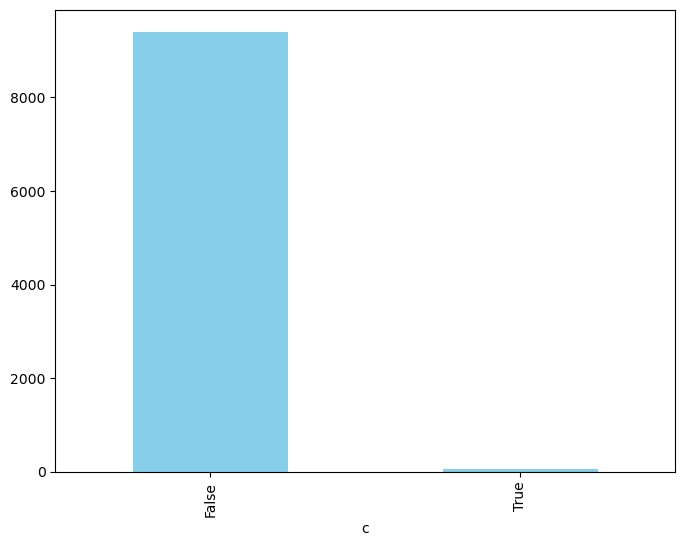

In [62]:
plt.figure(figsize=(8, 6))
set2['c'].value_counts().plot(kind='bar', color='skyblue')
plt.show()

This dataset is completely imbalanced. To fix this we will use imbalanced class weights in order to tell our model to give more importance to the minority class 

In [77]:
def run_expiriments_weighted(X, Y, scaler):
    warnings.filterwarnings("ignore")
    scorers = {
    'accuracy_score': make_scorer(accuracy_score),
    'balanced_accuracy_score': make_scorer(balanced_accuracy_score),
    'f1_score': make_scorer(f1_score, average='weighted'),
    'g_mean':make_scorer(geometric_mean_score, greater_is_better=True)
   }    
    pipelines = [
        ('Logistic Regression', Pipeline([('scaler', scaler), ('logistic', LogisticRegression(max_iter=1000,class_weight='balanced',random_state=1))])),
        ('Perceptron', Pipeline([('scaler', scaler), ('perceptron', Perceptron(max_iter=10000,class_weight='balanced', random_state=1))])),
        ('SVM Linear', Pipeline([('scaler', scaler), ('svm', SVC(kernel='linear', max_iter=10000,class_weight='balanced',random_state=1))])),
        ('SVM RBF', Pipeline([('scaler', scaler), ('svm', SVC(kernel='rbf',max_iter=10000,class_weight='balanced',random_state=1))])),
        ('Decision Tree', Pipeline([('scaler', scaler), ('classifier',DecisionTreeClassifier(random_state=1,class_weight='balanced'))])),
        ('Random Forest', Pipeline([('scaler', scaler), ('classifier',RandomForestClassifier(random_state=1,class_weight='balanced'))])),
        ('MLP', Pipeline([('scaler', scaler), ('classifier', MLPClassifier( hidden_layer_sizes=(100,50), max_iter=1000, random_state=1))])),
    ]

    result_tables = []  

    for name, pipe in pipelines:
        cv_results = cross_validate(pipe, X, Y, cv=5, scoring=scorers, return_train_score=True)

        result_table = pd.DataFrame({
            'Classifier': [name],
            'Accuracy': [cv_results['test_accuracy_score'].mean()],
            'F1 Score': [cv_results['test_f1_score'].mean()],
            'Balanced Accuracy': [cv_results['test_balanced_accuracy_score'].mean()],
            'G_mean': [cv_results['test_g_mean'].mean()],
            'Fit Time': [cv_results['fit_time'].mean()]
        })

        result_tables.append(result_table)

    final_result_table = pd.concat(result_tables, ignore_index=True)
    return final_result_table

In [78]:
Y = np.array(set2.iloc[:, 38])
X = np.array(set2.iloc[:,:38])
MC1_None=run_expiriments_weighted(X,Y,None)

In [79]:
MC1_None

,Classifier,Accuracy,F1 Score,Balanced Accuracy,G_mean,Fit Time
0,Logistic Regression,0.867,0.922,0.815,0.810,0.884
1,Perceptron,0.063,0.107,0.498,0.229,0.012
2,SVM Linear,0.769,0.778,0.540,0.199,0.289
3,SVM RBF,0.936,0.961,0.764,0.742,3.815
4,Decision Tree,0.987,0.989,0.794,0.761,0.031
5,Random Forest,0.988,0.989,0.729,0.675,0.532
6,MLP,0.990,0.988,0.506,0.053,1.391


In [80]:

MC1_Standard=run_expiriments_weighted(X,Y,StandardScaler())

In [81]:
MC1_Standard

,Classifier,Accuracy,F1 Score,Balanced Accuracy,G_mean,Fit Time
0,Logistic Regression,0.886,0.933,0.854,0.851,0.126
1,Perceptron,0.867,0.922,0.828,0.822,0.021
2,SVM Linear,0.875,0.927,0.841,0.837,0.989
3,SVM RBF,0.968,0.978,0.814,0.793,1.016
4,Decision Tree,0.987,0.989,0.794,0.761,0.202
5,Random Forest,0.988,0.989,0.729,0.675,1.727
6,MLP,0.994,0.993,0.704,0.636,10.597


In [82]:
MC1_MinMax=run_expiriments_weighted(X,Y,MinMaxScaler())

In [83]:
MC1_MinMax

,Classifier,Accuracy,F1 Score,Balanced Accuracy,G_mean,Fit Time
0,Logistic Regression,0.850,0.912,0.844,0.843,0.061
1,Perceptron,0.705,0.794,0.770,0.738,0.020
2,SVM Linear,0.839,0.906,0.845,0.845,1.444
3,SVM RBF,0.856,0.916,0.838,0.835,1.142
4,Decision Tree,0.987,0.989,0.787,0.753,0.037
5,Random Forest,0.988,0.989,0.729,0.675,0.746
6,MLP,0.993,0.992,0.652,0.546,16.069


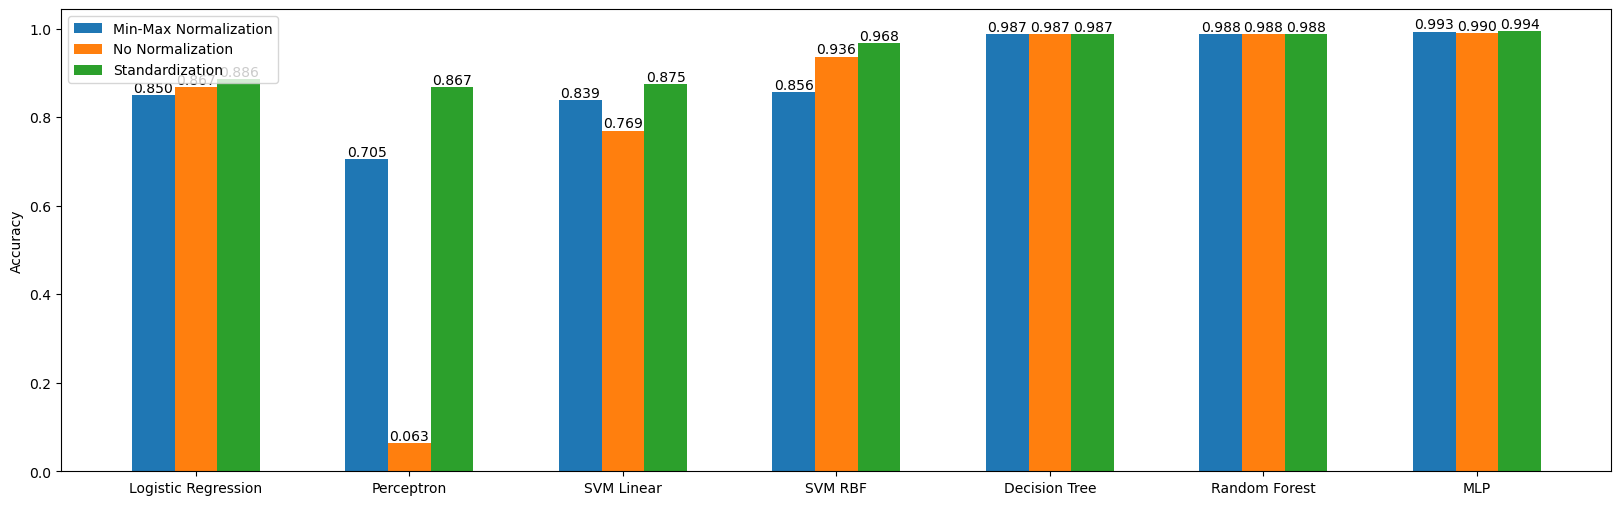

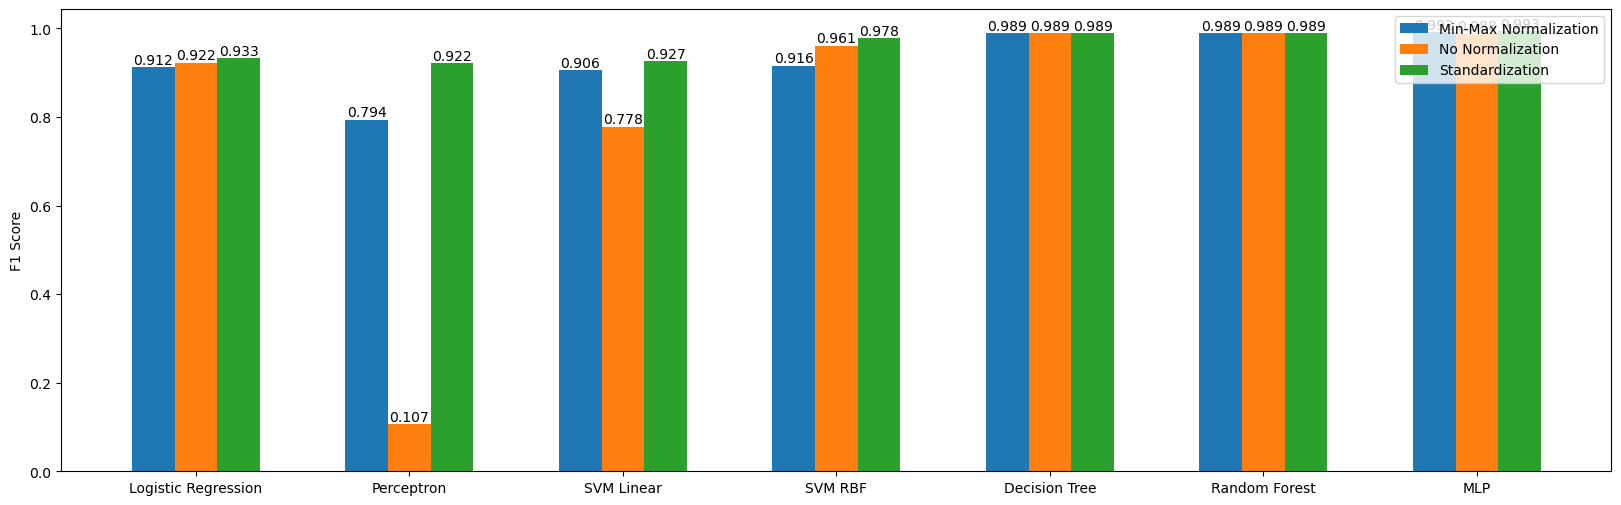

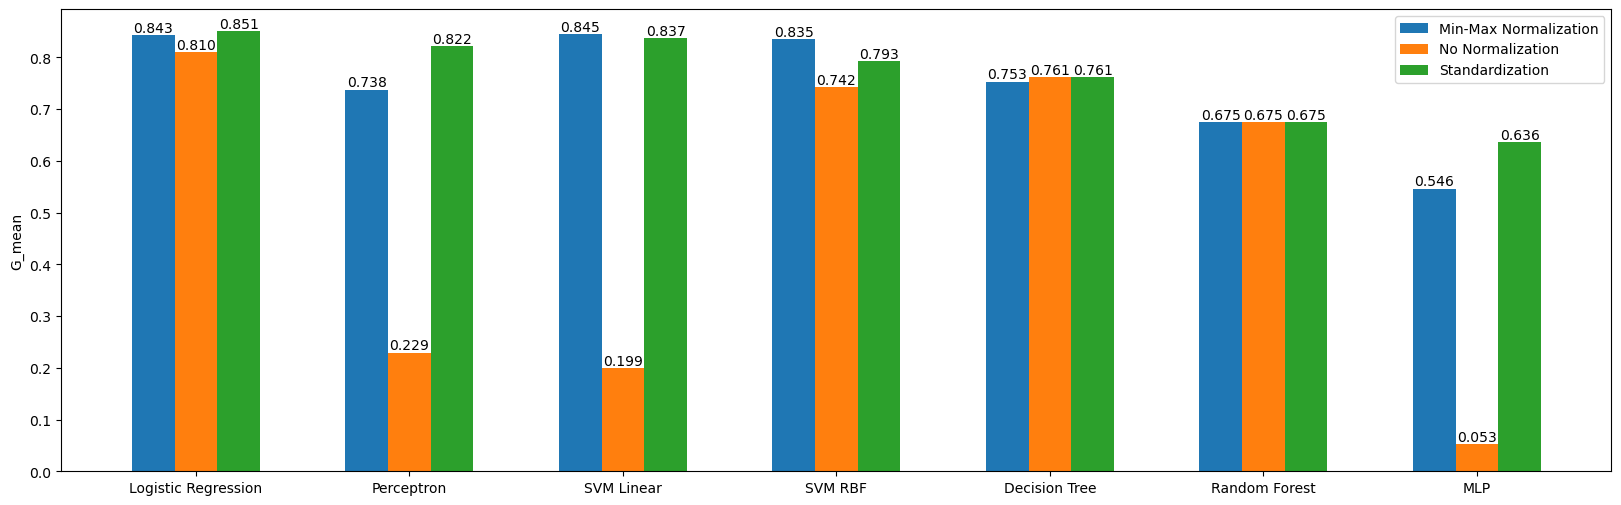

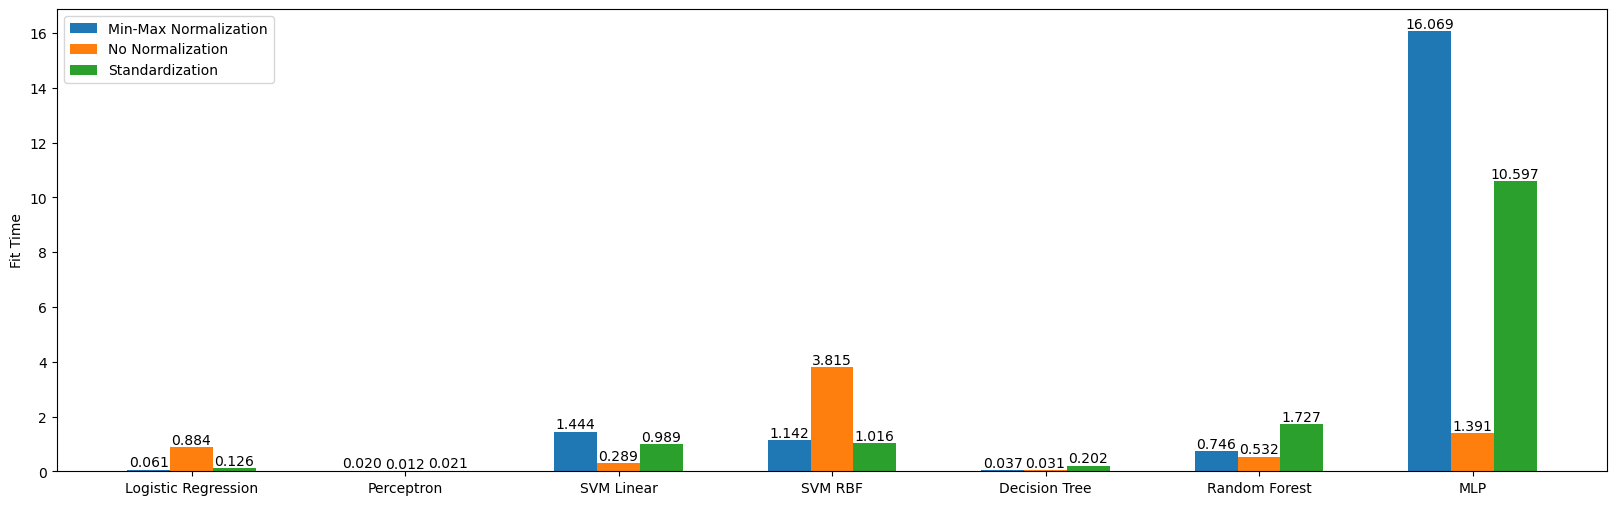

In [84]:
plot_experiment_results(MC1_MinMax, MC1_None, MC1_Standard)


Something interesting that we can clearly see is the really poor performance of the perceptron when we don't apply any standardization method. One possible explanation is the oscillation when we apply SGD. The algorithm seems to be stuck at one point (a stationary point), and it can't move further. However, when we transform our data, we avoid this.

Another fact that we can evaluate is the G_mean of 0.053 for the MLP with Min-Max and standardization. It fails completely to predict the minority class, and since the data are imbalanced a lot, it's possible to achieve a high F1 score since it predicts well the majority class. In other words, MLP understands that the minority class is useless.

Same story as the previous dataset with SVM Linear and perceptron with or without performing data transformation. Maybe it eliminates the influence of overfitting.

Except for Perceptron, data transformation shows really high accuracies and F1 Score. The best performance in terms of accuracy is 99.4% with MLP. Such high accuracies are probably a red flag of overfitting.

Decision Tree and Random Forest perform well in terms of accuracy and F1 but not that good in G_Mean compared with other models. This is also a sign of overfitting.

If we take care of the three accuracies and want to find the best solution, we will lean towards logistic regression, since it scores well on accuracy, F1, and G_Mean.

MLP takes a huge amount of time with standardization methods, and maybe we can explain this with numerical issues or zig-zag or again the really small alpha value of 0.001 for the activation method.

RBF also takes much more time to compute the results without data transformation.

# Dataset 3

In [85]:
set3 = pd.read_csv('pc3.csv',sep=",")

Y = np.array(set3.iloc[:, 37])
X= np.array(set3.iloc[:,:37])


In [86]:
set3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1563 entries, 0 to 1562
Data columns (total 38 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   LOC_BLANK                        1563 non-null   int64  
 1   BRANCH_COUNT                     1563 non-null   int64  
 2   CALL_PAIRS                       1563 non-null   int64  
 3   LOC_CODE_AND_COMMENT             1563 non-null   int64  
 4   LOC_COMMENTS                     1563 non-null   int64  
 5   CONDITION_COUNT                  1563 non-null   int64  
 6   CYCLOMATIC_COMPLEXITY            1563 non-null   int64  
 7   CYCLOMATIC_DENSITY               1563 non-null   float64
 8   DECISION_COUNT                   1563 non-null   int64  
 9   DECISION_DENSITY                 1563 non-null   float64
 10  DESIGN_COMPLEXITY                1563 non-null   int64  
 11  DESIGN_DENSITY                   1563 non-null   float64
 12  EDGE_COUNT          

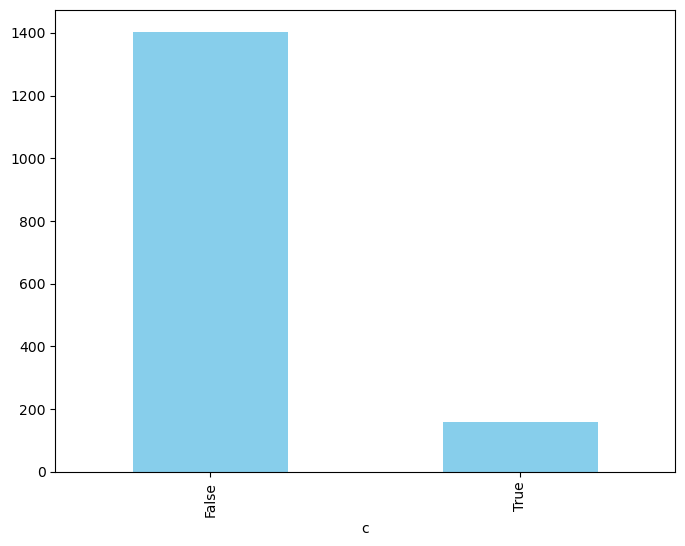

In [87]:
plt.figure(figsize=(8, 6))
set3['c'].value_counts().plot(kind='bar', color='skyblue')
plt.show()

In [88]:
PC3_None_1=run_expiriments_weighted(X,Y,None)

In [89]:
PC3_None_1

,Classifier,Accuracy,F1 Score,Balanced Accuracy,G_mean,Fit Time
0,Logistic Regression,0.792,0.826,0.740,0.736,0.288
1,Perceptron,0.311,0.274,0.480,0.083,0.003
2,SVM Linear,0.731,0.761,0.612,0.480,0.070
3,SVM RBF,0.839,0.843,0.592,0.496,0.100
4,Decision Tree,0.857,0.859,0.624,0.548,0.023
5,Random Forest,0.901,0.874,0.571,0.385,0.402
6,MLP,0.815,0.802,0.484,0.141,0.225


In [90]:
PC3_Standard=run_expiriments_weighted(X,Y,StandardScaler())

In [91]:
PC3_Standard

,Classifier,Accuracy,F1 Score,Balanced Accuracy,G_mean,Fit Time
0,Logistic Regression,0.779,0.817,0.752,0.749,0.017
1,Perceptron,0.670,0.733,0.675,0.674,0.005
2,SVM Linear,0.782,0.820,0.776,0.775,0.088
3,SVM RBF,0.797,0.829,0.751,0.748,0.069
4,Decision Tree,0.856,0.858,0.621,0.543,0.024
5,Random Forest,0.900,0.873,0.568,0.378,0.400
6,MLP,0.880,0.873,0.623,0.531,2.402


In [92]:
PC3_MinMaxScaler=run_expiriments_weighted(X,Y,MinMaxScaler())

In [93]:
PC3_MinMaxScaler

,Classifier,Accuracy,F1 Score,Balanced Accuracy,G_mean,Fit Time
0,Logistic Regression,0.759,0.803,0.744,0.743,0.009
1,Perceptron,0.508,0.512,0.590,0.395,0.004
2,SVM Linear,0.765,0.807,0.753,0.752,0.062
3,SVM RBF,0.782,0.820,0.754,0.752,0.071
4,Decision Tree,0.859,0.861,0.628,0.554,0.023
5,Random Forest,0.897,0.871,0.563,0.369,0.399
6,MLP,0.877,0.871,0.627,0.535,3.741


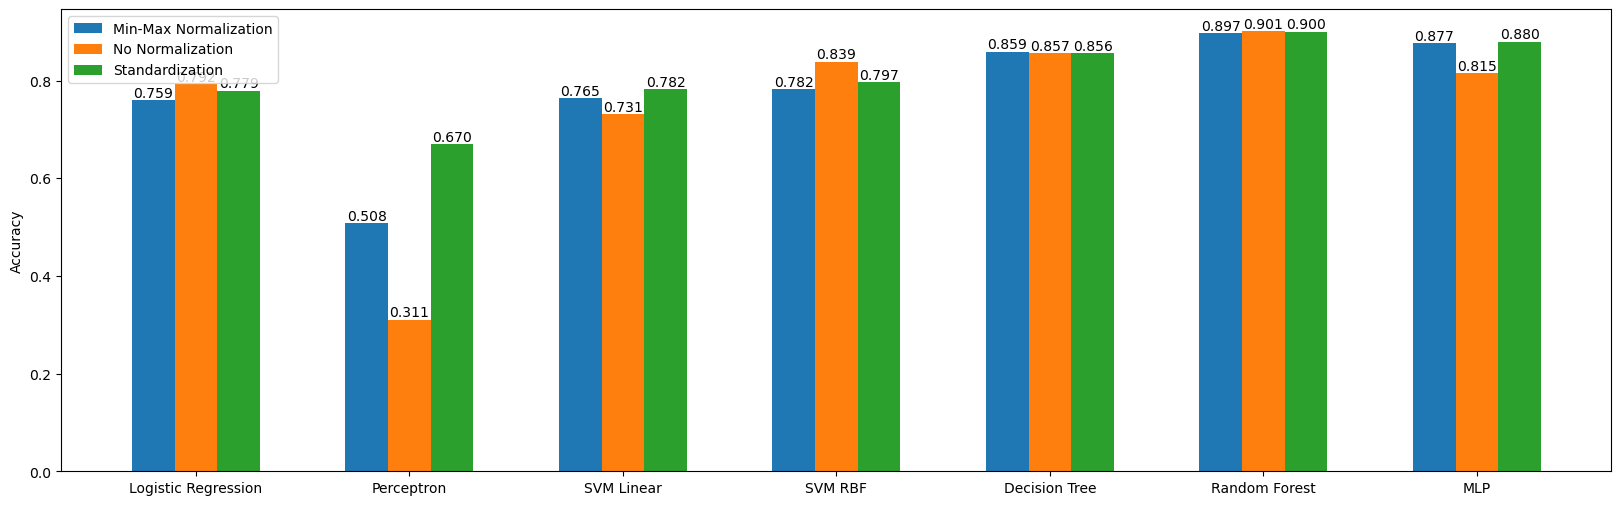

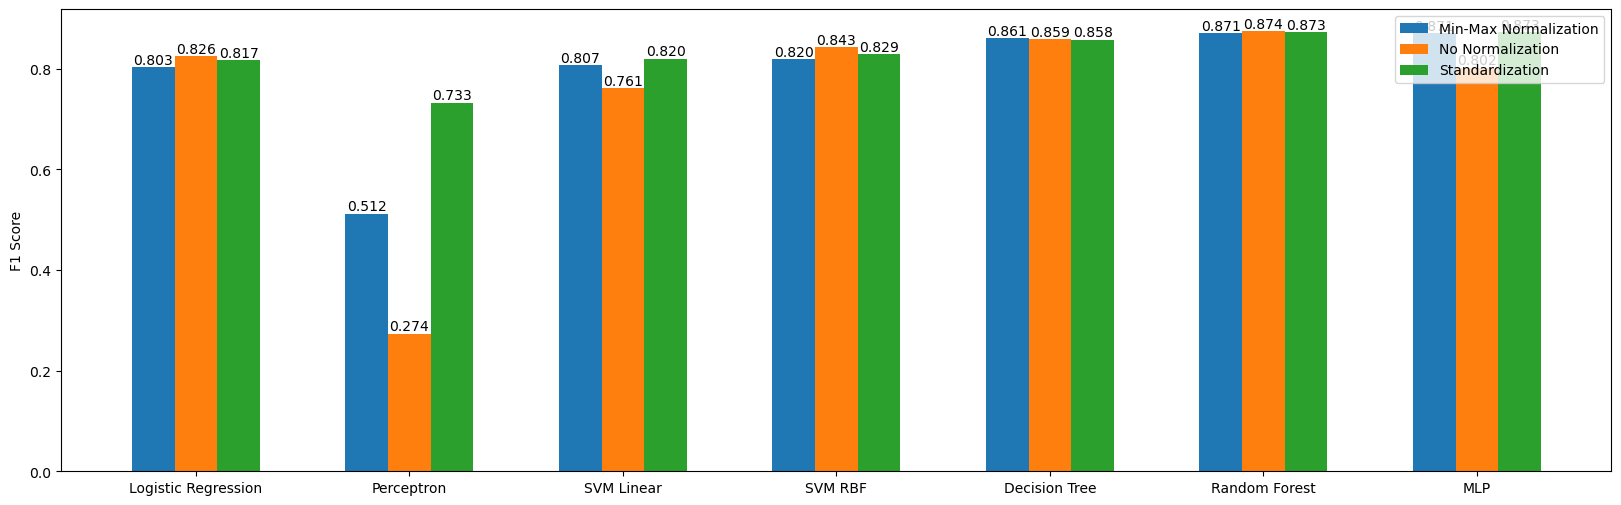

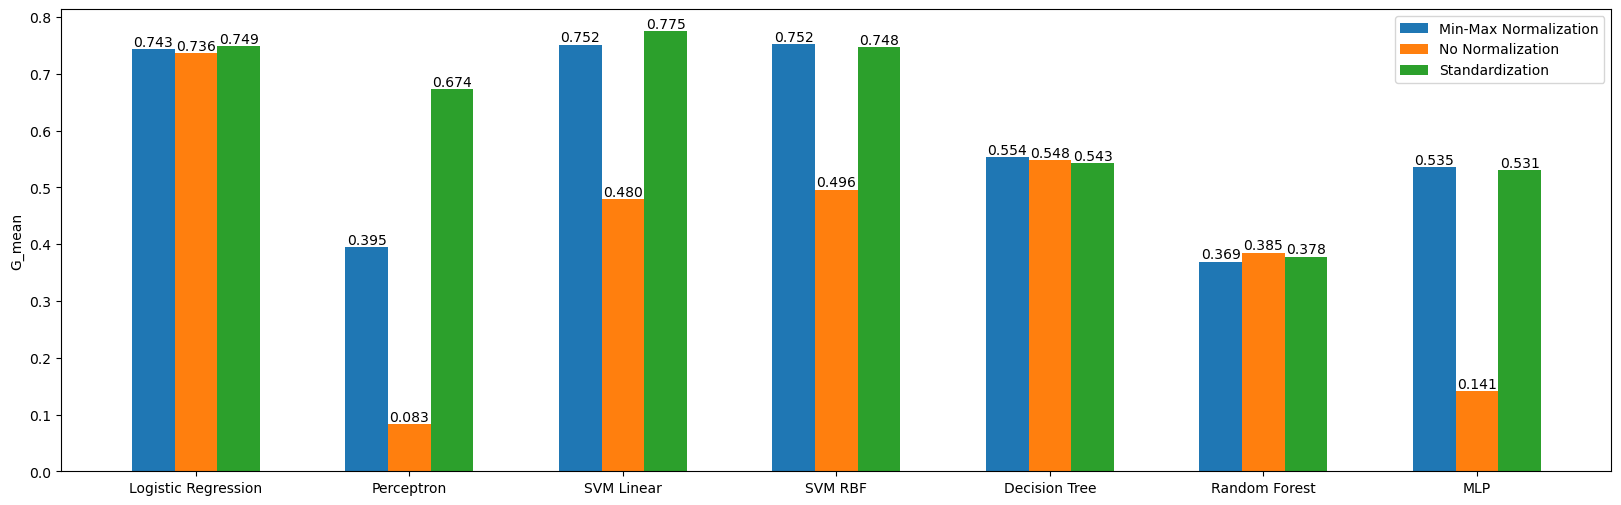

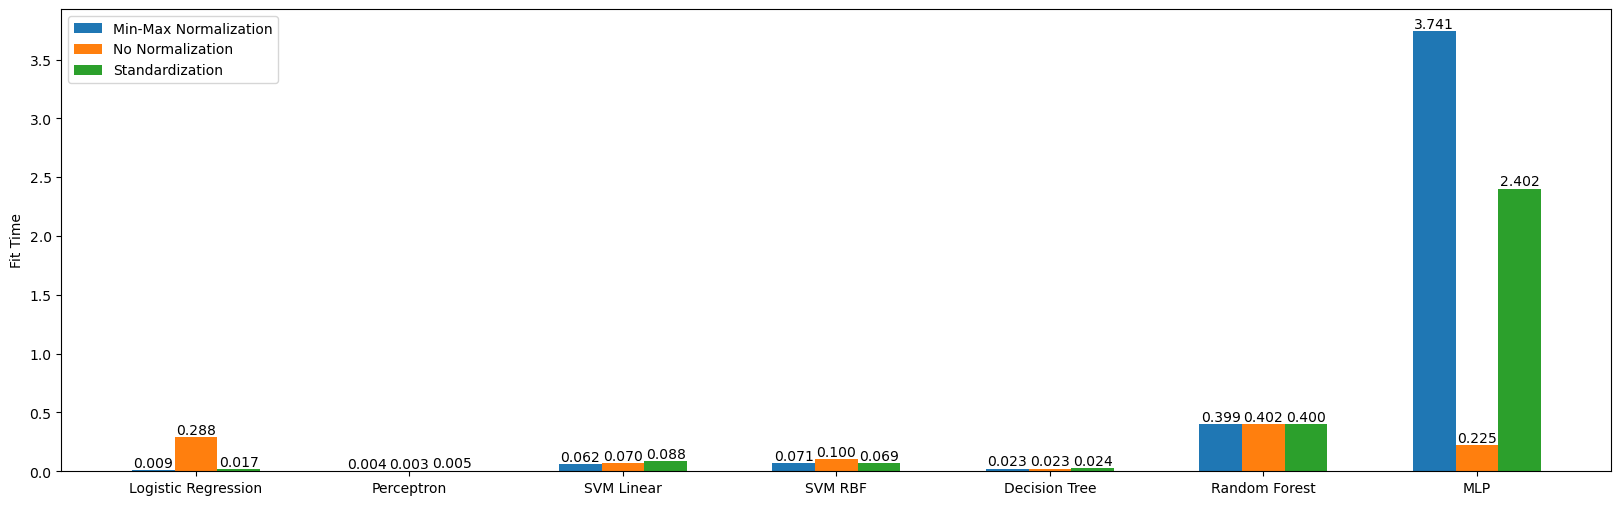

In [94]:
plot_experiment_results(PC3_MinMaxScaler, PC3_None_1, PC3_Standard)

In Min-Max Normalization, we can see that it gives us better results on this dataset for every model and for every metric (except fit time). The high accuracy, high F1 score, and low G_Mean observed in MLPs suggest that the model may be overfitting our data. When we transform our data, it takes much more time to compute the results. Additionally, on this dataset, gradient descent oscillates due to a low learning rate (alpha), resulting in high computational time.

Perceptron has the same behavior as before, and we give the same explanation as we have given in Dataset 1. In terms of accuracy, Random Forest performs better. However, the G_Mean score is not that good compared to other classifiers (an indication of overfitting as well).

Let's check the behavior of SVM RBF on this dataset. When we don't use normalization methods, accuracy and F1 are high with a low G_Mean score. But when we use normalization methods, accuracy and F1 drop down, and G_Mean and Balanced Accuracy improve a lot. That's a good sign since it may mean that SVM RBF with no normalization methods overfits the data.

In this dataset, we observe that SVM Linear and SVM RBF perform almost the same. That's an indication that our classes may be separated linearly. However, perceptron performs poorly while also trying to separate data linearly. The difference is in the nature of SVM: SVM tries to perfectly separate classes by maximizing the margin distance, while perceptron just tries to find a good but not the best decision hyperplane. If we also consider the outliers that exist on this dataset, we may conclude that it creates a decision hyperplane that tries to reach the outliers and performs poorly.

Logistic Regression needs more time here when we don't use normalization methods, maybe because of arithmetic errors caused by the outliers.

# Final thoughts

All the datasets may need to be tested and evaluated using other resampling methods. Weight class balances can really help when dealing with imbalanced datasets. In the case of imbalanced datasets, we should focus more on F1 score, G_Mean, and balanced accuracy rather than accuracy. This is because we aim to correctly predict the minority class.

There is no fixed rule for building a good model; we always need to check and evaluate. MLP, Random Forest, RBF, and Decision Tree have longer computation times. Data transformation can help with outliers; however, standardization is more highly affected as it uses the mean and standard deviation, which are already high due to the presence of outliers. This doesn't imply that Min-Max normalization is robust to outliers; it uses max and min values for transformations.

Outliers are handled here using normalization methods. However, it may be interesting to examine the outlier data itself, exploring its nature or applying other methods, such as clustering.

In these datasets, we didn't use feature selection at all, which is essential for machine learning, especially when addressing a specific question.

The performance of SVMs in all three datasets may be improved by using a more strict C value than the default of 1 that sklearn takes.